In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings('ignore')

## Read Data

In [2]:
df = pd.read_csv('/content/arthritis_part2.csv')


## Data Cleaning

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head(10)

,id,y,sex,age,trt,baseline,time
0,152,3.0,2,24,1,3,1
1,152,3.0,2,24,1,3,3
2,152,3.0,2,24,1,3,5
3,153,2.0,2,48,1,2,1
4,153,2.0,2,48,1,2,3
5,153,3.0,2,48,1,2,5
6,154,NaN,2,52,1,3,1
7,154,3.0,2,52,1,3,3
8,154,3.0,2,52,1,3,5
9,155,3.0,1,52,1,2,1


In [4]:
df.rename(columns={"id": "Patient_ID", "sex":"Gender","trt": "Treatment", "baseline": "Baseline", "y": "Swollen_Joints", "time": "Time"}, inplace=True)

In [5]:
df.head(10)

,Patient_ID,Swollen_Joints,Gender,age,Treatment,Baseline,Time
0,152,3.0,2,24,1,3,1
1,152,3.0,2,24,1,3,3
2,152,3.0,2,24,1,3,5
3,153,2.0,2,48,1,2,1
4,153,2.0,2,48,1,2,3
5,153,3.0,2,48,1,2,5
6,154,NaN,2,52,1,3,1
7,154,3.0,2,52,1,3,3
8,154,3.0,2,52,1,3,5
9,155,3.0,1,52,1,2,1


In [6]:
df['Treatment'] = df['Treatment'].map({1: "Prednisone", 2: "Placebo"})

In [7]:
df['Gender'] = df['Gender'].map({1: "Male", 2: "Female"})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      453 non-null    int64  
 1   Swollen_Joints  441 non-null    float64
 2   Gender          453 non-null    object 
 3   age             453 non-null    int64  
 4   Treatment       453 non-null    object 
 5   Baseline        453 non-null    int64  
 6   Time            453 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 24.9+ KB


In [9]:
df.isna().sum()

,0
Patient_ID,0
Swollen_Joints,12
Gender,0
age,0
Treatment,0
Baseline,0
Time,0


In [10]:
df.describe()

,Patient_ID,Swollen_Joints,age,Baseline,Time
count,453.000000,441.000000,453.000000,453.000000,453.000000
mean,227.000000,3.072562,50.006623,2.774834,3.000000
std,43.637181,0.967281,11.273646,0.985552,1.634799
min,152.000000,1.000000,22.000000,1.000000,1.000000
25%,189.000000,2.000000,40.000000,2.000000,1.000000
50%,227.000000,3.000000,54.000000,3.000000,3.000000
75%,265.000000,4.000000,58.000000,3.000000,5.000000
max,302.000000,5.000000,65.000000,5.000000,5.000000


In [11]:
df['Gender'].value_counts()

,count
Gender,
Female,291
Male,162


In [12]:
df['Swollen_Joints'].value_counts()

,count
Swollen_Joints,
3.0,171
4.0,125
2.0,97
5.0,25
1.0,23


In [13]:
df['Treatment'].value_counts()

,count
Treatment,
Prednisone,228
Placebo,225


## Exploratory Data Analysis (EDA)

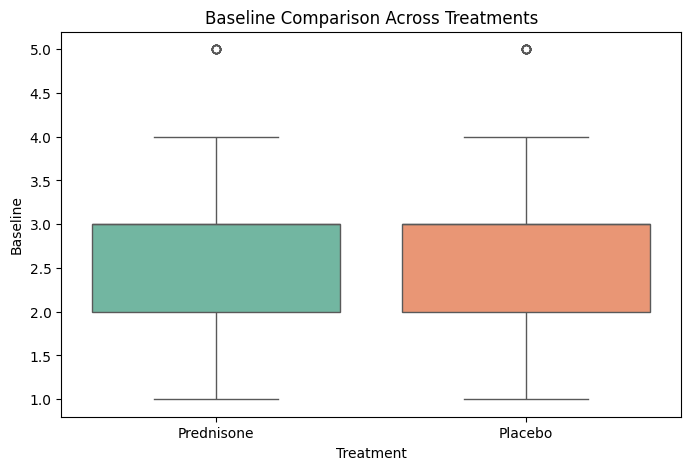

In [14]:
# Baseline comparison between treatments
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Treatment", y="Baseline", palette="Set2")
plt.title("Baseline Comparison Across Treatments")
plt.show()

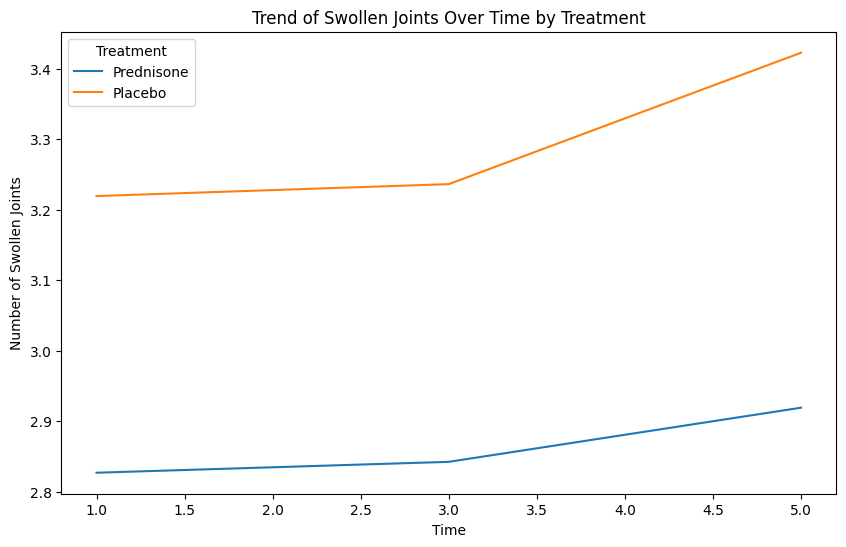

In [15]:
# Swollen joints (y) trend over time for each treatment
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Time", y="Swollen_Joints", hue="Treatment", ci=None)
plt.title("Trend of Swollen Joints Over Time by Treatment")
plt.xlabel("Time")
plt.ylabel("Number of Swollen Joints")
plt.legend(title="Treatment")
plt.show()

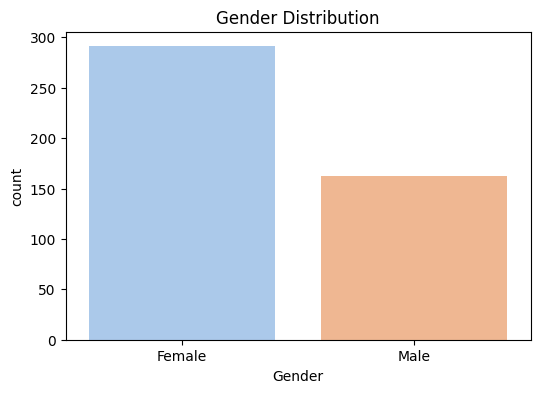

In [16]:
# Gender distribution in the dataset
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Gender", palette="pastel")
plt.title("Gender Distribution")
plt.show()

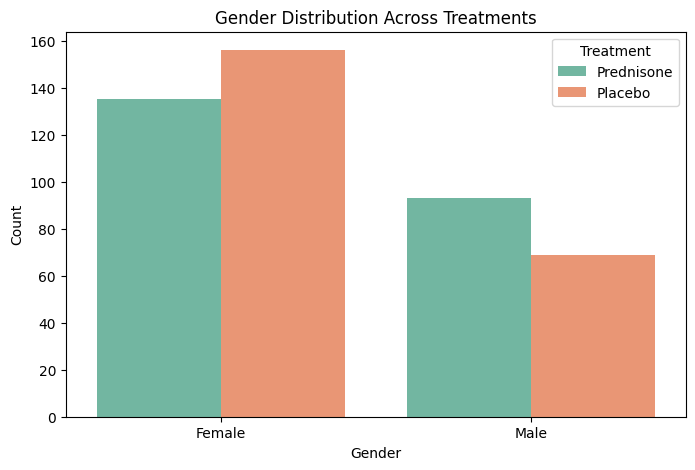

In [17]:
# Count plot for Gender Distribution by Treatment
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Gender", hue="Treatment", palette="Set2")
plt.title("Gender Distribution Across Treatments")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Treatment")
plt.show()

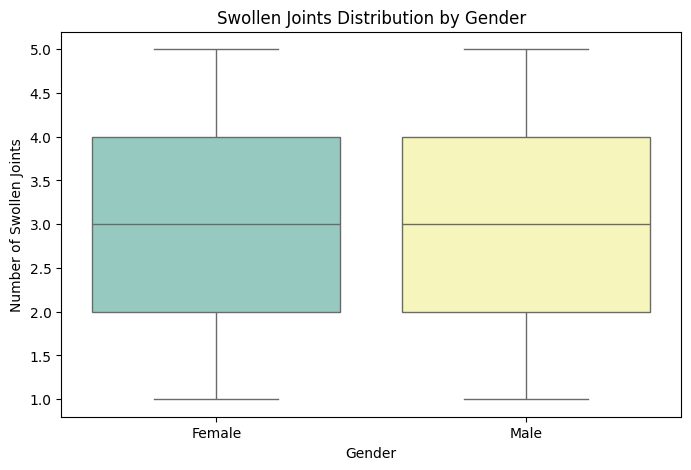

In [18]:
# Box plot of Swollen Joints by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Gender", y="Swollen_Joints", palette="Set3")
plt.title("Swollen Joints Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Swollen Joints")
plt.show()

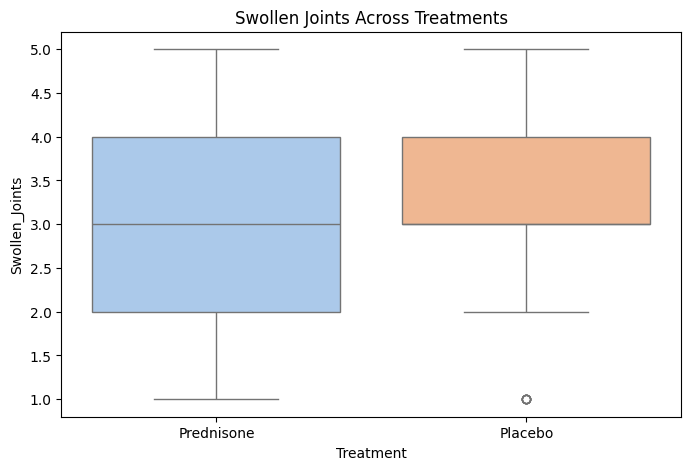

In [19]:
# Compare swollen joints by treatment group
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Treatment", y="Swollen_Joints", palette="pastel")
plt.title("Swollen Joints Across Treatments")
plt.show()

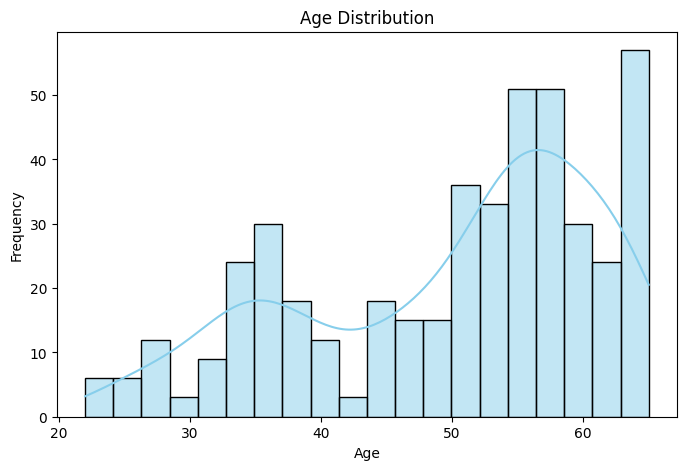

In [20]:
# Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

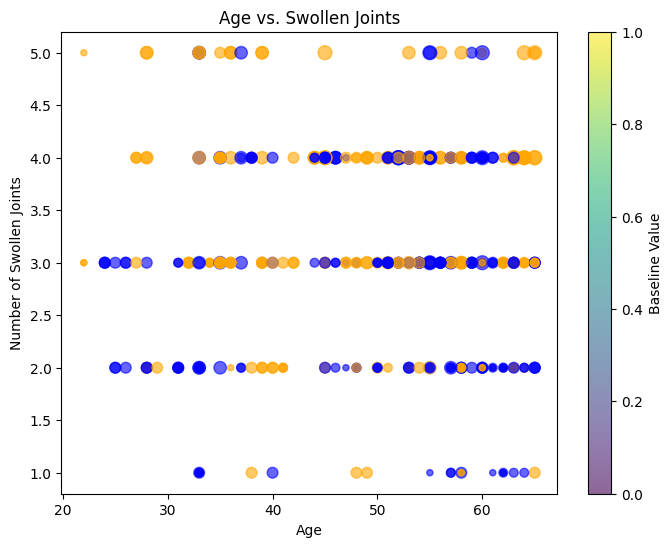

In [21]:
# Age vs. Swollen Joints with Baseline as Bubble Size
plt.figure(figsize=(8, 6))
bubble_size = df['Baseline'] / df['Baseline'].max() * 100  # Scale the bubble sizes
plt.scatter(df['age'], df['Swollen_Joints'], s=bubble_size, c=df['Treatment'].map({"Prednisone": "blue", "Placebo": "orange"}), alpha=0.6)
plt.title("Age vs. Swollen Joints")
plt.xlabel("Age")
plt.ylabel("Number of Swollen Joints")
plt.colorbar(label="Baseline Value")
plt.show()



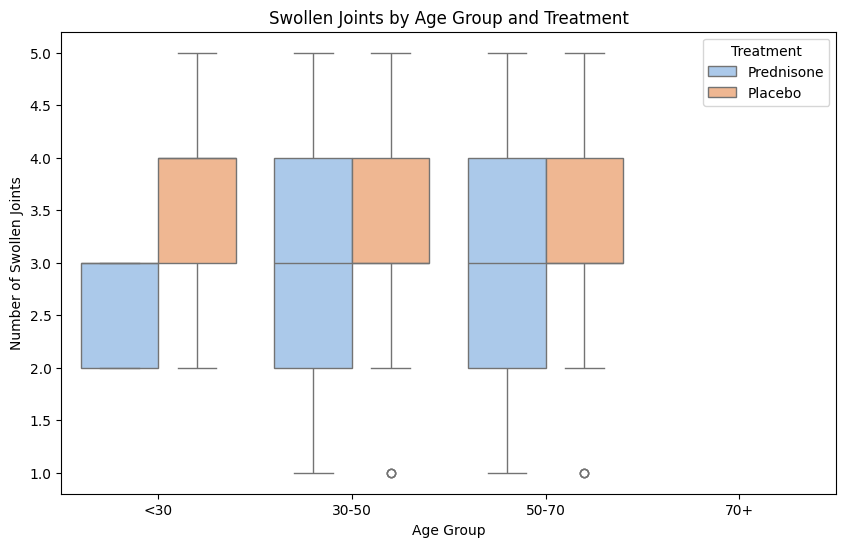

In [22]:
# Create age groups
df['Age_Group'] = pd.cut(df['age'], bins=[0, 30, 50, 70, 90], labels=["<30", "30-50", "50-70", "70+"])

# Swollen Joints by Age Group and Treatment
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Age_Group", y="Swollen_Joints", hue="Treatment", palette="pastel")
plt.title("Swollen Joints by Age Group and Treatment")
plt.xlabel("Age Group")
plt.ylabel("Number of Swollen Joints")
plt.legend(title="Treatment")
plt.show()

## Data Preprocessing

In [23]:
# Handle Missing Data
df.dropna(subset=['Swollen_Joints'], inplace=True)


In [24]:
# Encode Categorical Variables
label_encoders = {}
for col in ['Gender', 'Treatment']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [25]:
# Normalize Numeric Features
scaler = StandardScaler()
df[['age', 'Baseline', 'Time']] = scaler.fit_transform(df[['age', 'Baseline', 'Time']])

In [26]:
# Prepare Features and Target
X = df[['Gender', 'age', 'Treatment', 'Baseline', 'Time']].values
y = df['Swollen_Joints'].values


In [27]:
# Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Simulate Clients by Splitting Training Data
num_clients = 3
X_splits = np.array_split(X_train, num_clients)
y_splits = np.array_split(y_train, num_clients)

## Build Moadel

In [29]:
# Federated Learning Function
def federated_training(X_splits, y_splits, num_rounds=5):
    global_model = LinearRegression()

    for round in range(num_rounds):
        client_weights = []
        client_intercepts = []

        for X_client, y_client in zip(X_splits, y_splits):
            local_model = LinearRegression()
            local_model.fit(X_client, y_client)
            client_weights.append(local_model.coef_)
            client_intercepts.append(local_model.intercept_)

        # Federated Averaging
        avg_weights = np.mean(client_weights, axis=0)
        avg_intercept = np.mean(client_intercepts)

        # Update Global Model
        global_model.coef_ = avg_weights
        global_model.intercept_ = avg_intercept

    return global_model


In [30]:
# Train Global Model using Federated Learning
global_model = federated_training(X_splits, y_splits)

In [31]:
# Evaluate Global Model
y_pred = global_model.predict(X_test)
mse_loss = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Global Model Test MSE: {mse_loss:.4f}")
print(f"Global Model Test R²: {r2:.4f}")

Global Model Test MSE: 0.9420
Global Model Test R²: 0.0643


In [32]:
import torch
import torch.nn as nn
import torch.optim as optim

In [33]:
# Define the Neural Network
class ArthritisNet(nn.Module):
    def __init__(self):
        super(ArthritisNet, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(5, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.fc(x)


In [34]:
# Local Training Function
def train_local_model(model, data, target, epochs=200, lr=0.001):
    model.train()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)
    loss_fn = nn.MSELoss()

    for _ in range(epochs):
        optimizer.zero_grad()
        predictions = model(data)
        loss = loss_fn(predictions.flatten(), target)
        loss.backward()
        optimizer.step()
    return model.state_dict()

In [35]:
# Federated Averaging
def federated_avg(client_weights):
    global_weights = client_weights[0]
    for key in global_weights.keys():
        global_weights[key] = torch.mean(torch.stack([weights[key] for weights in client_weights]), dim=0)
    return global_weights

In [36]:
# Convert Data to PyTorch Tensors
X_splits = [torch.tensor(X, dtype=torch.float32) for X in X_splits]
y_splits = [torch.tensor(y, dtype=torch.float32) for y in y_splits]
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [37]:
# Initialize Global Model
global_model = ArthritisNet()

# Federated Learning Training Loop
num_rounds = 5
for round in range(num_rounds):
    client_weights = []
    for X_client, y_client in zip(X_splits, y_splits):
        local_model = ArthritisNet()
        local_model.load_state_dict(global_model.state_dict())
        local_weights = train_local_model(local_model, X_client, y_client)
        client_weights.append(local_weights)

    # Aggregate Weights
    global_weights = federated_avg(client_weights)
    global_model.load_state_dict(global_weights)

In [38]:
# Evaluate Global Model on Test Data
global_model.eval()
with torch.no_grad():
    predictions = global_model(X_test_tensor).flatten()
    mse_loss = nn.MSELoss()(predictions, y_test_tensor)
    ss_res = torch.sum((y_test_tensor - predictions) ** 2)
    ss_tot = torch.sum((y_test_tensor - torch.mean(y_test_tensor)) ** 2)
    r2_score = 1 - (ss_res / ss_tot)

print(f"Global Model Test MSE: {mse_loss.item():.4f}")
print(f"Global Model Test R²: {r2_score.item():.4f}")

Global Model Test MSE: 0.9015
Global Model Test R²: 0.1045


In [39]:


import pickle
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Assuming 'global_model' is your trained model (either LinearRegression or ArthritisNet)
# and you want to save it to a file named 'global_model.pkl' in your Google Drive.

with open('/content/drive/MyDrive/global_model2.pkl', 'wb') as f: # Changed path to '/content/drive/MyDrive/...'
    pickle.dump(global_model, f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
